In [1]:
import requests
from Config import ConsumerKey as key

In [2]:
# define our endpoint
endpoint = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')

In [3]:
# definte our payload
payload = {'apikey':key,
          'periodType':'month',
          'period':'1',
          'frequencyType':'daily',
          'frequency':'1',
          'startDate':'1651285293',
          'needExtendedHoursData':'true'}

In [4]:
# make a request
content = requests.get(url = endpoint, params = payload)

In [5]:
# convert it to a dictionary
data = content.json()

In [6]:
import pandas as pd

In [7]:
df2 = pd.json_normalize(data['candles']) 

In [8]:
import matplotlib.pyplot as plt

In [9]:
x = df2['datetime']
y = df2['close']

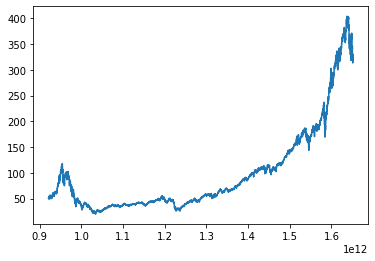

In [10]:
plt.plot(x,y)

In [11]:
import datetime

In [12]:
df = df2.copy()

In [13]:
df['datetime'] = df['datetime'].floordiv(1000)

In [14]:
def datetimeconvert(x):
    return datetime.datetime.fromtimestamp(x)

In [15]:
df['datetime'] = df['datetime'].apply(datetimeconvert)

In [16]:
x = df['datetime']
y = df['close']

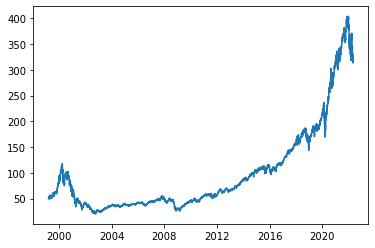

In [17]:
plt.plot(x,y)

In [18]:
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format('QQQ')
# endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/{}/chains'.format('QQQ')
endpoint2 = r'https://api.tdameritrade.com/v1/marketdata/chains'

In [19]:
payload2 = {'apikey':key,
           'symbol':'QQQ',
           'strikeCount':'30',
           'fromDate':'2022-04-01'}

In [20]:
content2 = requests.get(url = endpoint2, params = payload2)

In [21]:
data2 = content2.json()

In [22]:
optionsChain = pd.json_normalize(data2) 

In [23]:
optionsChain

,symbol,status,underlying,strategy,interval,isDelayed,isIndex,interestRate,underlyingPrice,volatility,...,callExpDateMap.2024-01-19:624.340.0,callExpDateMap.2024-01-19:624.345.0,callExpDateMap.2024-01-19:624.350.0,callExpDateMap.2024-01-19:624.355.0,callExpDateMap.2024-01-19:624.360.0,callExpDateMap.2024-01-19:624.365.0,callExpDateMap.2024-01-19:624.370.0,callExpDateMap.2024-01-19:624.375.0,callExpDateMap.2024-01-19:624.380.0,callExpDateMap.2024-01-19:624.385.0
0,QQQ,SUCCESS,None,SINGLE,0.0,True,False,0.1,313.545,29.0,...,"[{'putCall': 'CALL', 'symbol': 'QQQ_011924C340...","[{'putCall': 'CALL', 'symbol': 'QQQ_011924C345...","[{'putCall': 'CALL', 'symbol': 'QQQ_011924C350...","[{'putCall': 'CALL', 'symbol': 'QQQ_011924C355...","[{'putCall': 'CALL', 'symbol': 'QQQ_011924C360...","[{'putCall': 'CALL', 'symbol': 'QQQ_011924C365...","[{'putCall': 'CALL', 'symbol': 'QQQ_011924C370...","[{'putCall': 'CALL', 'symbol': 'QQQ_011924C375...","[{'putCall': 'CALL', 'symbol': 'QQQ_011924C380...","[{'putCall': 'CALL', 'symbol': 'QQQ_011924C385..."


In [24]:
# optionsChain

In [25]:
# for i in optionsChain.columns:
#     print(i)

In [26]:
# optionsChain['callExpDateMap.2022-05-02:0.304.0']

In [27]:
# counter=0
# for i in range(12,1812):
#     counter+=1
#     print(i)
# print(counter)

In [28]:
# len(optionsChain.transpose())-12

In [29]:
categories = ['putCall','symbol', 'volatility','delta','gamma',
              'theta','vega','rho','totalVolume', 'openInterest','strikePrice']

In [30]:
# optionsChain.iat[0,12][0].get('putCall')

In [31]:
# for i in range(len(optionsChain.transpose())-12):
#     print(optionsChain.iat[0, i+12][0])

In [32]:
selected = pd.DataFrame(columns = categories, dtype = object)

In [33]:
# selected

In [34]:
for i in range(len(optionsChain.transpose())-12):
    for j in categories:
        # iterate and put values into 'selected' dataframe
        selected.at[i, j] = optionsChain.iat[0, i+12][0].get(j)

In [35]:
selected

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,totalVolume,openInterest,strikePrice
0,PUT,QQQ_050622P298,NaN,NaN,NaN,NaN,-999,NaN,2327,1593,298
1,PUT,QQQ_050622P299,NaN,NaN,NaN,NaN,-999,NaN,10734,2279,299
2,PUT,QQQ_050622P300,NaN,NaN,NaN,NaN,-999,NaN,61037,16951,300
3,PUT,QQQ_050622P301,NaN,NaN,NaN,NaN,-999,NaN,7532,4721,301
4,PUT,QQQ_050622P302,45.134,-0.09,0.017,-0.386,0.035,-0.001,6393,3552,302
...,...,...,...,...,...,...,...,...,...,...,...
1735,CALL,QQQ_011924C365,24.252,0.434,0.004,-0.04,1.658,1.872,61,491,365
1736,CALL,QQQ_011924C370,24.062,0.415,0.004,-0.039,1.64,1.801,79,2659,370
1737,CALL,QQQ_011924C375,23.878,0.396,0.004,-0.038,1.619,1.729,23,435,375
1738,CALL,QQQ_011924C380,23.691,0.377,0.004,-0.037,1.594,1.656,108,1228,380


In [36]:
'''cycle through all dates; add them to set; create new dfs with set; place relevant items into relevant dfs'''

'cycle through all dates; add them to set; create new dfs with set; place relevant items into relevant dfs'

In [37]:
# a = selected['symbol'][0]
# a[4:10]

In [38]:
# month = a[4:6]
# day = a[6:8]
# year = a[8:10]
# print(month, day, year)

In [39]:
import collections

In [40]:
# %%time
# # create set for use with dataFrame creation loop (name of dfs = date portion of 'symbol')
# dateSet = set()

# for i in selected['symbol']:
# #     print(selected['symbol'][4:10])
# #     print(i[4:10])
#     a = i[4:10]
#     dateSet.add(a)
# print(dateSet)

In [41]:
# %%time
# # create set for use with dataFrame creation loop (name of dfs = date portion of 'symbol')
# dateSet = set()

# for i in selected['symbol']:
# #     print(selected['symbol'][4:10])
# #     print(i[4:10])
#     a = i[4:10]
#     dateSet.add(a)
# dateSet = list(dateSet)
# print(dateSet)

In [42]:
%%time
# create set for use with dataFrame creation loop (name of dfs = date portion of 'symbol')
dateSet = []
for i in selected['symbol']:
#     print(selected['symbol'][4:10])
#     print(i[4:10])
    if i[4:10] not in dateSet:
        a = i[4:10]
        dateSet.append(a)
print(dateSet)

['050622', '050922', '051122', '051322', '051622', '051822', '052022', '052322', '052522', '052722', '053122', '060122', '060322', '061022', '061722', '062422', '063022', '071522', '081922', '091622', '093022', '121622', '123022', '012023', '031723', '033123', '061623', '121523', '011924']
Wall time: 1.01 ms


In [43]:
# creating dataframes via loop with names = items from dateSet above
d = {}
for name in dateSet:
    d[name] = pd.DataFrame(columns = categories, dtype = object)

In [44]:
d

{'050622': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, totalVolume, openInterest, strikePrice]
 Index: [],
 '050922': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, totalVolume, openInterest, strikePrice]
 Index: [],
 '051122': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, totalVolume, openInterest, strikePrice]
 Index: [],
 '051322': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, totalVolume, openInterest, strikePrice]
 Index: [],
 '051622': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, totalVolume, openInterest, strikePrice]
 Index: [],
 '051822': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, rho, totalVolume, openInterest, strikePrice]
 Index: [],
 '052022': Empty DataFrame
 Columns: [putCall, symbol, volatility, delta, gamma, theta, vega, 

In [45]:
%%time
# loop through all dateSet dates, then loop through all rows in selected(dataframe),
#  check if date from dateSet is within symbol from current row of selected(dataframe),
#  if date from dateSet is within symbol from current row of selected(dataframe) then add the 
#  current row of selected(dataframe) into the dateSet dates' dataframe (dataframes are housed
#  within the 'd' dictionary which is a dictionary of dataframes created for each date)
for dates in dateSet:
#     print(i)
    counter = 0
    for symbol in selected['symbol']:
        
        if dates in symbol:
#             print(j)
#             print(d[i])
            d[dates].loc[len(d[dates].index)] = selected.loc[counter]
        counter += 1

Wall time: 8.47 s


In [46]:
d

{'050622':    putCall          symbol volatility  delta  gamma  theta     vega    rho  \
 0      PUT  QQQ_050622P298        NaN    NaN    NaN    NaN -999.000    NaN   
 1      PUT  QQQ_050622P299        NaN    NaN    NaN    NaN -999.000    NaN   
 2      PUT  QQQ_050622P300        NaN    NaN    NaN    NaN -999.000    NaN   
 3      PUT  QQQ_050622P301        NaN    NaN    NaN    NaN -999.000    NaN   
 4      PUT  QQQ_050622P302     45.134  -0.09  0.017 -0.386    0.035 -0.001   
 5      PUT  QQQ_050622P303     44.632 -0.107   0.02 -0.427    0.039 -0.001   
 6      PUT  QQQ_050622P304     43.992 -0.125  0.022 -0.465    0.044 -0.002   
 7      PUT  QQQ_050622P305     43.717 -0.149  0.025 -0.512    0.049 -0.002   
 8      PUT  QQQ_050622P306     43.005 -0.172  0.029 -0.546    0.054 -0.002   
 9      PUT  QQQ_050622P307      42.51   -0.2  0.032 -0.583    0.059 -0.003   
 10     PUT  QQQ_050622P308     42.359 -0.234  0.035 -0.624    0.065 -0.003   
 11     PUT  QQQ_050622P309      41.78 -0.

In [47]:
d.get('051822')

,putCall,symbol,volatility,delta,gamma,theta,vega,rho,totalVolume,openInterest,strikePrice
0,PUT,QQQ_051822P294,41.710,-0.191,0.011,-0.229,0.165,-0.023,74,202,294.0
1,PUT,QQQ_051822P295,41.455,-0.201,0.011,-0.235,0.170,-0.024,124,311,295.0
2,PUT,QQQ_051822P296,41.230,-0.212,0.012,-0.240,0.176,-0.025,53,246,296.0
3,PUT,QQQ_051822P298,40.796,-0.235,0.013,-0.251,0.187,-0.028,110,371,298.0
4,PUT,QQQ_051822P300,40.307,-0.260,0.013,-0.260,0.197,-0.031,768,760,300.0
5,PUT,QQQ_051822P302,39.828,-0.287,0.014,-0.268,0.207,-0.034,355,541,302.0
6,PUT,QQQ_051822P304,39.409,-0.316,0.015,-0.275,0.216,-0.037,566,308,304.0
7,PUT,QQQ_051822P305,39.161,-0.330,0.015,-0.277,0.220,-0.038,1089,2031,305.0
8,PUT,QQQ_051822P306,38.939,-0.346,0.016,-0.279,0.224,-0.040,268,463,306.0
9,PUT,QQQ_051822P307,38.717,-0.361,0.016,-0.281,0.227,-0.041,299,145,307.0


In [48]:
# testDF.loc[len(testDF.index)] = selected.loc[counter]

In [49]:
# testDF = pd.DataFrame(columns = categories, dtype = object)

In [50]:
# # Iterate through selected DF and put all rows of specific date into one new dataframe
# counter = 0
# for i in selected['symbol']:
#     if '050222' in i:
#             testDF.loc[len(testDF.index)] = selected.loc[counter]
#     counter+=1

In [51]:
# testDF

In [52]:
# testDF['isCall'] = 1

In [53]:
# #categorize puts and calls with 1 hot for 1 = CALL
# counter = 0
# for i in testDF['putCall']:
#     if i == 'PUT':
#         testDF.at[counter,'isCall'] = 0
#     counter+=1

In [54]:
# testDF

In [55]:
# testDF.loc[testDF['putCall'] == 'CALL']

In [56]:
'''Run script once a day before open; store all tables into a dictionary named after the current date'''

'Run script once a day before open; store all tables into a dictionary named after the current date'

In [57]:
from datetime import date

In [58]:
currentDay = date.today()

In [59]:
currentDay

datetime.date(2022, 5, 5)

In [60]:
today = str(currentDay.month)+str(currentDay.day)+str(currentDay.year)

In [61]:
today

'552022'

In [62]:
# Checking if single digit date and adding zeros accordingly; formatting entire date properly
if len(str(currentDay.day)) == 1:
    correctedDay = str(currentDay.day).zfill(2)
#     print(correctedDay)
else:
    correctedDay = currentDay.day
#     print(correctedDay)
if len(str(currentDay.month)) == 1:
    correctedMonth = str(currentDay.month).zfill(2)
#     print(correctedMonth)
else:
    correctedMonth = currentDay.month
#     print(correctedmonth)
    
today = str(correctedMonth)+str(correctedDay)+str(currentDay.year)
today

'05052022'

In [63]:
# Creating dictionary of dictionaries with today's date as the key
# bigDictionary = {today: d}

In [64]:
# # Creating dictionary of dictionaries with today's date as the key
# bigDictionary

In [65]:
# first_value = list(bigDictionary.values())[0]
# print('First Value: ', first_value)

In [66]:
# today = 'keykey'

In [67]:
# today = str(currentDay.day)+str(currentDay.month)+str(currentDay.year)
# today

In [68]:
bigDictionary = {}

In [69]:
# Iteratively adding dictionaries per day
bigDictionary[today] = d

In [70]:
bigDictionary

{'05052022': {'050622':    putCall          symbol volatility  delta  gamma  theta     vega    rho  \
  0      PUT  QQQ_050622P298        NaN    NaN    NaN    NaN -999.000    NaN   
  1      PUT  QQQ_050622P299        NaN    NaN    NaN    NaN -999.000    NaN   
  2      PUT  QQQ_050622P300        NaN    NaN    NaN    NaN -999.000    NaN   
  3      PUT  QQQ_050622P301        NaN    NaN    NaN    NaN -999.000    NaN   
  4      PUT  QQQ_050622P302     45.134  -0.09  0.017 -0.386    0.035 -0.001   
  5      PUT  QQQ_050622P303     44.632 -0.107   0.02 -0.427    0.039 -0.001   
  6      PUT  QQQ_050622P304     43.992 -0.125  0.022 -0.465    0.044 -0.002   
  7      PUT  QQQ_050622P305     43.717 -0.149  0.025 -0.512    0.049 -0.002   
  8      PUT  QQQ_050622P306     43.005 -0.172  0.029 -0.546    0.054 -0.002   
  9      PUT  QQQ_050622P307      42.51   -0.2  0.032 -0.583    0.059 -0.003   
  10     PUT  QQQ_050622P308     42.359 -0.234  0.035 -0.624    0.065 -0.003   
  11     PUT  QQQ_

In [71]:
'''begin pickle process to commit each days addition to a running file'''

'begin pickle process to commit each days addition to a running file'

In [72]:
# bbbb = datetime.date.today() + datetime.timedelta(days=5)

In [73]:
# bbbb

In [74]:
# tomorrow = str(bbbb.day)+str(bbbb.month)+str(bbbb.year)

In [75]:
# tomorrow

In [76]:
# # Checking if single digit date and adding zeros accordingly; formatting entire date properly
# if len(str(bbbb.day)) == 1:
#     correctedDay = str(bbbb.day).zfill(2)
#     print(correctedDay)
# else:
#     correctedDay = bbbb.day
#     print(correctedDay)
# if len(str(bbbb.month)) == 1:
#     correctedMonth = str(bbbb.month).zfill(2)
#     print(correctedMonth)
# else:
#     correctedMonth = bbbb.month
#     print(correctedmonth)
    
# tomorrow = str(correctedDay)+str(correctedMonth)+str(bbbb.year)
# tomorrow

In [77]:
# import pickle

In [78]:
# some_obj = {'a':'c'}
# some_obj

In [79]:
# with open('mypickle.pickle', 'wb') as f:
#     pickle.dump(bigDictionary, f)

In [80]:
# del bigDictionary

In [81]:
# print(bigDictionary)

In [82]:
# try:
#     with open('mypickle.pickle', 'rb') as f:
#         bigDictionary = pickle.load(f)
# except Exception as e:
#     print(e)

In [83]:
# print(bigDictionary)